/var/folders/nf/256s4k8131j6prvssbwmwtm00000gn/T/ipykernel_70255/2513166830.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{x:.0f}%' for x in ticks_loc]);


<Figure size 640x480 with 0 Axes>

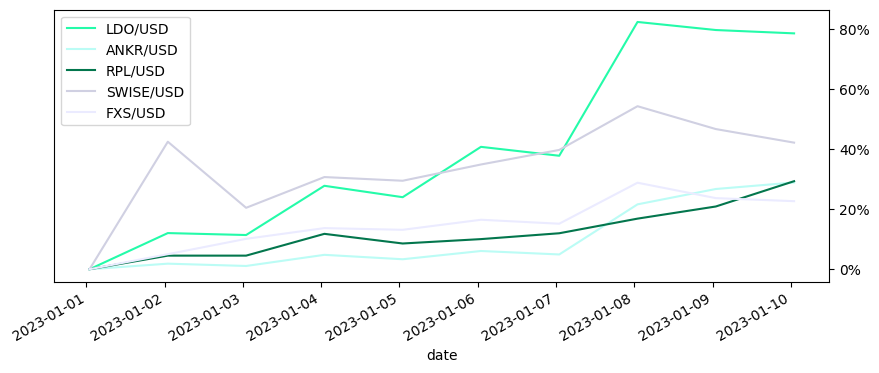

In [23]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv('BINANCE_LDOUSDT, 1D (2).csv')
df['time'] = df['time'].apply(lambda x: datetime.fromtimestamp(x))
df = df[(df['time'] >= datetime.fromisoformat('2023-01-01')) & (df['time'] < datetime.fromisoformat('2023-01-11'))]



df['rel_percent_LDO'] = 100*(df['close'] / df['close'].iloc[0]) -100
df['rel_percent_ANKR'] = 100*(df['ANKRUSDT, BINANCE: Close'] / df['ANKRUSDT, BINANCE: Close'].iloc[0]) -100
df['rel_percent_RPL'] = 100*(df['RPLUSD, KRAKEN: Close'] / df['RPLUSD, KRAKEN: Close'].iloc[0]) -100
df['rel_percent_SWISE'] = 100*(df["SWISEWETH, UNISWAP3ETH: Close"] / df["SWISEWETH, UNISWAP3ETH: Close"].iloc[0]) -100
df['rel_percent_FXS'] = 100*(df["FXSUSDT, BINANCE: Close"] / df["FXSUSDT, BINANCE: Close"].iloc[0]) -100

df.drop(columns = ['Smoothing Line' , 'Rolling POC', 'Volume', 'Volume MA','MA.1','MA.2','Developing VA High', 'Developing Poc', 'Developing VA Low', 'MA','Smoothing Line.2', 'Smoothing Line.1', 'Smoothing Line.3', 'ANKRUSDT, BINANCE: High','ANKRUSDT, BINANCE: Low', 'ANKRUSDT, BINANCE: Open', 'RPLUSD, KRAKEN: Open', 'RPLUSD, KRAKEN: High', 'RPLUSD, KRAKEN: Low', 'open', 'high', 'low', 'EMA'], inplace=True)
# filter the time

x = df['time']
y1 = df['rel_percent_LDO']
y2 = df["rel_percent_ANKR"].ffill()
y3 = df["rel_percent_RPL"].ffill()
y4 = df['rel_percent_SWISE'].ffill()
y5 = df['rel_percent_FXS'].ffill()

fig = plt.figure()
fig, ax = plt.subplots(figsize=(10,4))

ax.plot(x, y1, label='LDO/USD', color = (36/255, 251/255, 169/255))
ax.plot(x, y2, label='ANKR/USD', color =(187/255, 252/255, 226/235))
ax.plot(x, y3, label='RPL/USD', color =(3/255, 118/255, 71/235)) 
ax.plot(x, y4, label='SWISE/USD', color =(208/255, 208/255, 208/235))
ax.plot(x, y5, label='FXS/USD', color =(235/255, 235/255, 235/235))

ax.set_xlabel('date')
ax.xaxis_date()

fig.autofmt_xdate()

ticks_loc = ax.get_yticks().tolist();

ax.set_yticklabels([f'{x:.0f}%' for x in ticks_loc]);
ax.yaxis.tick_right()
ax.legend()
